In [1]:
# Edge cells alignment

In [2]:
!pwd
!date

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/FigureEdges
Tue Jul  5 12:04:38 PDT 2022


In [3]:
import os
import sys
import importlib
import concurrent
import numpy as np
import pandas as pd
import urllib.request
from pathlib import Path
from tqdm.notebook import tqdm
from skimage import io as skio
import matplotlib.pyplot as plt
from aicscytoparam import cytoparam
from sklearn.decomposition import PCA
from skimage import measure as skmeasure
from aicsshparam import shtools, shparam
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting

sys.path.insert(1, '../tools')
import common

In [4]:
config = general.load_config_file(path="/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_variance/loaddata", fname="parameters.yaml")
control = controller.Controller(config)
device = io.LocalStagingIO(control)
df_full = device.load_step_manifest("loaddata")
print(control.get_staging())
print(df_full.shape)

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_variance
(216062, 46)


In [5]:
config = general.load_config_file(path="/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_edge_cells_midpoint_expanded/shapemode", fname="parameters.yaml")
control = controller.Controller(config)
device = io.LocalStagingIO(control)
df_edge = device.load_step_manifest("preprocessing")
print(control.get_staging())
print(df_edge.shape)

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_edge_cells_midpoint_expanded
(5169, 1255)


In [6]:
CellId = 239049
FOVId = df_full.at[CellId,  "FOVId"]
print(CellId, FOVId)
producer = io.DataProducer(control)
producer.set_row(df_edge.loc[CellId])
producer.load_single_cell_data()

239049 286


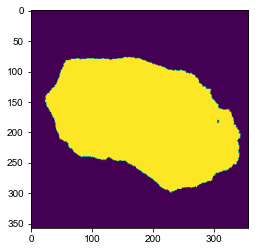

In [7]:
plt.imshow(producer.data[4].max(axis=0))

In [8]:
# Download and unzip the FOV from Allen Cell Feature Explorer
filename = "FOV.tar.gz"
url = "https://files.allencell.org/api/2.0/file/download?collection=cellviewer-2-0&id=F286"
urllib.request.urlretrieve(url, filename)

('FOV.tar.gz', <http.client.HTTPMessage at 0x7f12a723a700>)

In [9]:
# Unzip the file
!tar -xf FOV.tar.gz

In [10]:
# Open the unziped file
fname = [f for f in [f for f in os.listdir("./")] if f.endswith("ome.tif")][0]
print(fname)

AICS-12_286.ome.tif


In [11]:
# Load FOV
fov = AICSImage(fname).data.squeeze()
seg = fov[5]
zm, ym, xm = [int(0.5*u) for u in seg.shape]
seg = seg[zm]

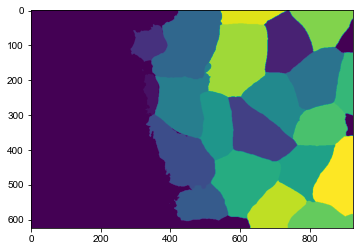

In [12]:
plt.imshow(seg)

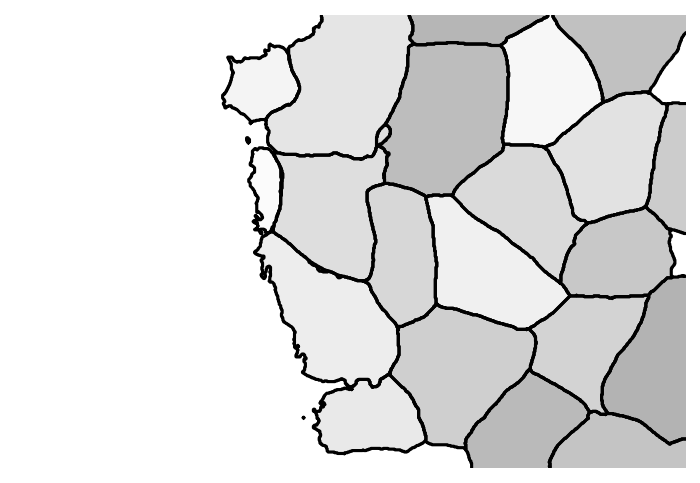

In [13]:
fig, ax = plt.subplots(1,1, dpi=150)
ax.imshow(seg, cmap="binary", alpha=0.3)
ax.axis("off")
for label in np.unique(seg):
    if label:
        conts = skmeasure.find_contours(seg==label)
        for cont in conts:
            ax.plot(cont[:, 1], cont[:, 0], color="black")
plt.savefig("FigureEdge5_fov1.png")
plt.show()

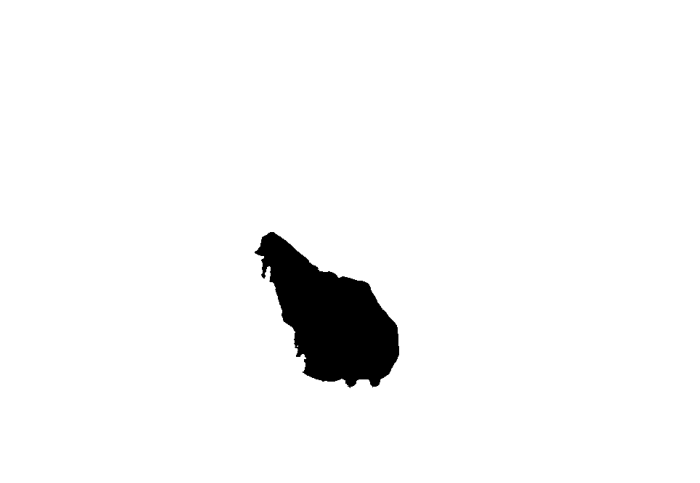

In [14]:
fig, ax = plt.subplots(1,1, dpi=150)
ax.imshow(seg==df_full.at[CellId,"this_cell_index"], cmap="binary", alpha=1)
ax.axis("off")
plt.savefig("FigureEdge5_fov2.png")
plt.show()

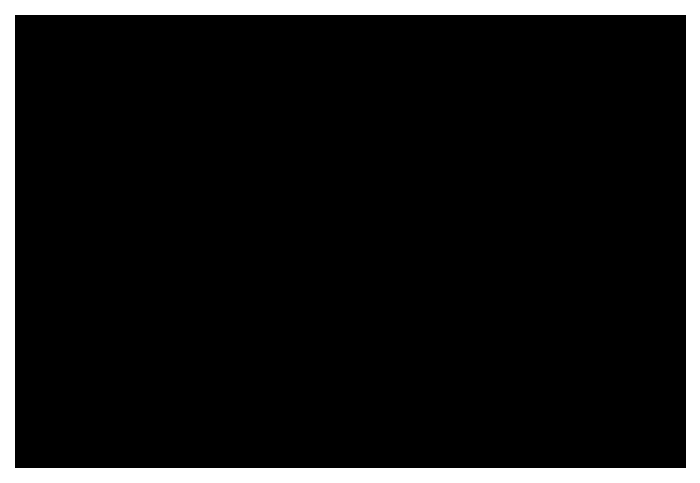

In [15]:
fig, ax = plt.subplots(1,1, dpi=150)
ax.imshow((seg<0), cmap="gray", alpha=1, vmin=0, vmax=1)
ax.axis("off")
plt.savefig("FigureEdge5_fov3.png")
plt.show()

In [16]:
[u.mean() for u in np.where(seg==5)]

[416.84366184767276, 434.3662288434415]

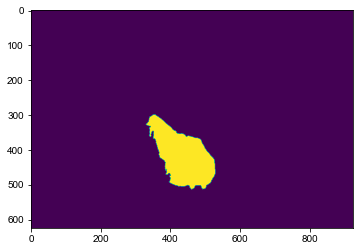

In [17]:
plt.imshow(seg==5)

In [18]:
common.now("complete")

complete 2022-07-05 12:05:23
